In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial.distance import cdist
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

X, y = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=1.2)

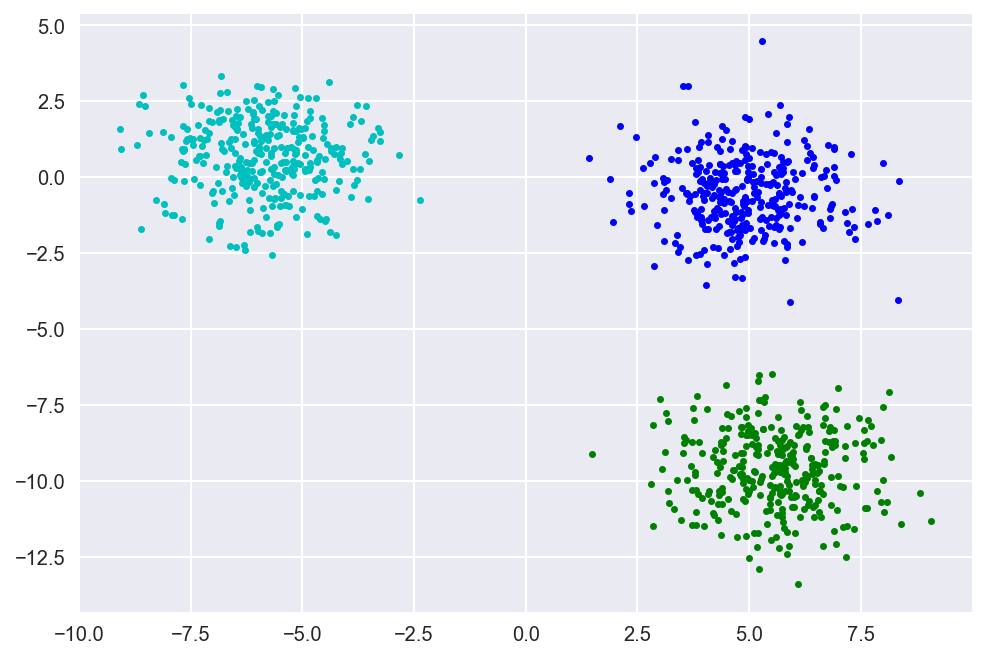

In [2]:
def plot_data(X, y, centers=None):
    def plot_points(points, symbol=None):
        plt.plot(points[:, 0], points[:, 1], symbol)
    def plot_line(points, symbol):
        plt.plot(points[:, 0], points[:, 1], symbol, linewidth=1)
    
    X_cls0, X_cls1, X_cls2 = [X[y == i] for i in range(3)]
    
    plot_points(X_cls0, 'b.')
    plot_points(X_cls1, 'c.')
    plot_points(X_cls2, 'g.')
    
    if centers is not None:
        plot_points(centers, 'ro')
    plt.show()

plot_data(X, y)

In [3]:
def random_initial_centers(X, n_clusters=3):
    return X[np.random.choice(X.shape[0], n_clusters, replace=False)]

def assign_to_clusters(X, centers):
    distances = cdist(X, centers)
    return np.argmin(distances, axis=1)

def update_centers(X, labels, n_clusters=3):
    new_centers = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        new_centers[k, :] = np.mean(X[labels == k], axis=0)
    return new_centers

def train(X, n_clusters=3, n_iterations=1000):
    n_examples, n_features = X.shape
    centers = random_initial_centers(X, n_clusters=n_clusters)
    labels = np.zeros(n_examples)
    
    for i in range(n_iterations):
        labels = assign_to_clusters(X, centers)
        centers = update_centers(X, labels, n_clusters=n_clusters)
    
    return {
        'labels': labels,
        'centers': centers
    }

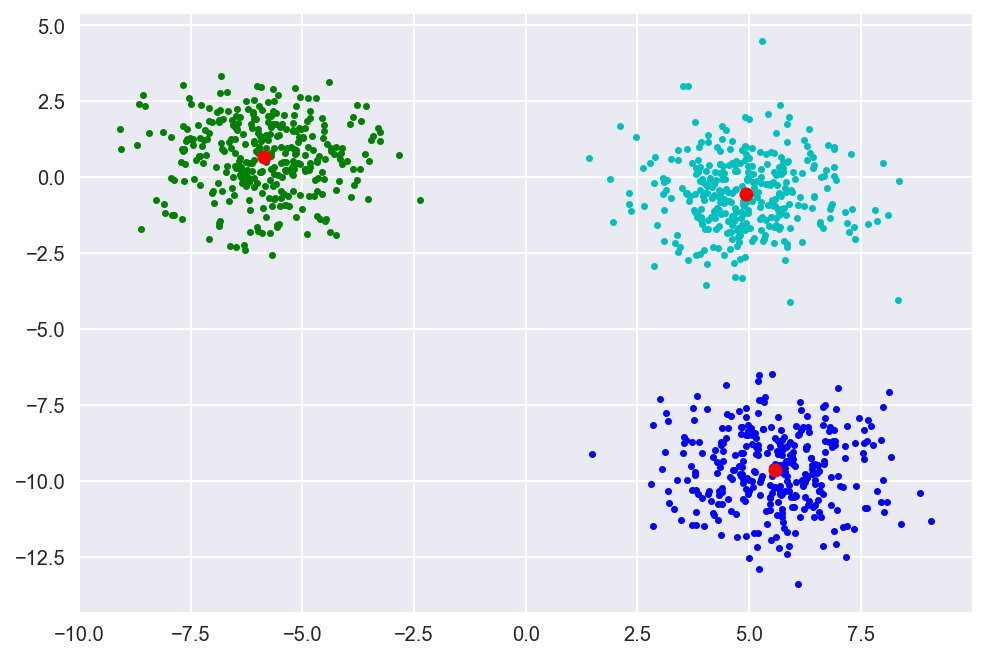

In [4]:
result = train(X, n_iterations=1000)
centers, labels = result['centers'], result['labels']
plot_data(X, labels, centers)